In [44]:
import matplotlib.pyplot as plt
import os

plt.style.use("fivethirtyeight")
plt.tight_layout()

basedir = "../assignments/A1/res"

os.makedirs(basedir, exist_ok=True)


<Figure size 640x480 with 0 Axes>

## 1.1 - Trapezoid Method for Numerical Integration

In [45]:
from methods import trapezoid_integral

Evaluating $$\int_0^\pi \sin(x)dx$$ with $h = 0.1$ and $h = 0.01$

Analytically, this integral resolves to $[\cos x]^0_\pi = 1 - 0 = 1$

In [46]:
from math import sin, pi

first = trapezoid_integral(sin, 0, pi, 0.1)
second = trapezoid_integral(sin, 0, pi, 0.01)

print(f"h = 0.1: {first[0]} in {first[1]} iterations")
print(f"h = 0.01: {second[0]} in {second[1]} iterations")

h = 0.1: 1.9966292525412175 in 32 iterations
h = 0.01: 1.9999479920714234 in 315 iterations


More generally:

In [47]:
h = 0.1

its = []
hs = []
values = []

while h > 10**-7:
	res = trapezoid_integral(sin, 0, pi, h)

	hs.append(h)
	its.append(res[1])
	values.append(res[0])

	h /= 10

In [48]:
print(hs)
print(values)
print(its)

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0000000000000002e-06, 1.0000000000000002e-07]
[1.9966292525412175, 1.9999479920714234, 1.999999750367962, 1.9999999983052663, 1.9999999999476539, 1.99999999998949, 2.000000000570725]
[32, 315, 3142, 31416, 314160, 3141593, 31415927]


Text(0, 0.5, 'computed value of integral')

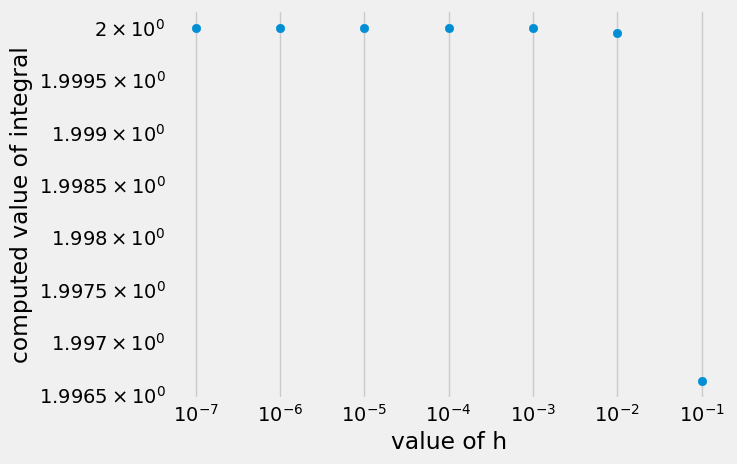

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(hs, values)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("value of h")
ax.set_ylabel("computed value of integral")


In [50]:
import os

fig.tight_layout()
fig.savefig(os.path.join(basedir, "1.1-convergence.png"), dpi=fig.dpi)

## 1-2: Euler's Method (i think?)

In [51]:
from math import e
from methods import solve_euler

y = lambda x: e**(x**2) + x
yp = lambda x: 2 * x * y(x) - 2 * x**2 + 1

solver_res = solve_euler(yp, 0, 1, 1, 0.1)
res = {0.1 * i: y(0.1 * i) for i in range(11)}

print(solver_res)
print(res)

{0: 1, 0.1: 1.1, 0.2: 1.2202010033416835, 0.30000000000000004: 1.361833434309379, 0.4: 1.5274838913316917, 0.5: 1.7213647610110365, 0.6000000000000001: 1.9497673026798106, 0.7000000000000001: 2.2217668324270514, 0.8: 2.5502911032208044, 0.9: 2.9537280439095968, 1.0: 3.458351481511362}
{0.0: 1.0, 0.1: 1.110050167084168, 0.2: 1.2408107741923882, 0.30000000000000004: 1.3941742837052105, 0.4: 1.5735108709918104, 0.5: 1.7840254166877414, 0.6000000000000001: 2.0333294145603404, 0.7000000000000001: 2.3323162199553793, 0.8: 2.6964808793049517, 0.9: 3.147907986676471, 1.0: 3.718281828459045}


In [52]:
# make sure error accumulation does not kill us here
assert tuple(solver_res.keys()) == tuple(res.keys())

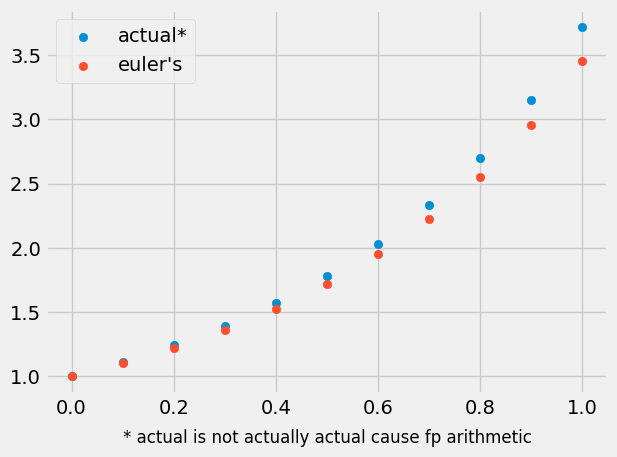

In [53]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

plt.scatter(list(solver_res.keys()), list(res.values()), label = "actual*")
plt.scatter(list(solver_res.keys()), list(solver_res.values()), label = "euler's")
plt.legend()
plt.title("* actual is not actually actual cause fp arithmetic", y = -0.15, fontdict={"size": 12})

plt.tight_layout()
plt.savefig(os.path.join(basedir, "1.2-divergence.png"))

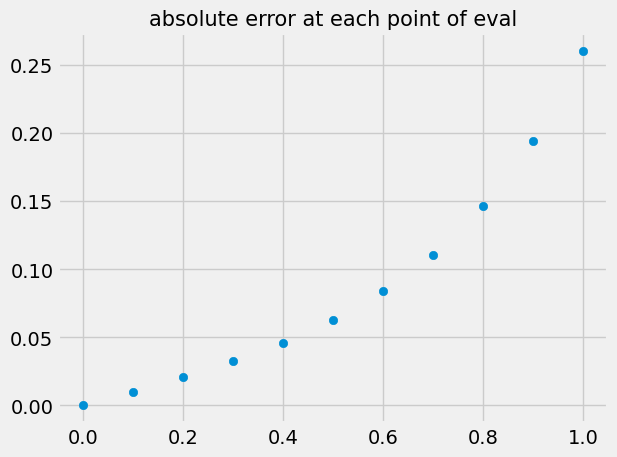

In [54]:
abs_errors = [abs(t[0] - t[1]) for t in zip(res.values(), solver_res.values())]

plt.scatter(list(solver_res.keys()), abs_errors)
plt.title("absolute error at each point of eval", fontdict={"size":15})
plt.tight_layout()
plt.savefig(os.path.join(basedir, "1.2-error.png"))

## 1.3 - Computing the Square Root of 2 with Newton-Rhapson

In [55]:
from methods import newton_rhapson

In [56]:
y = lambda x: x**2 - 2
yp = lambda x: 2 * x

nr_steps = 50

xs = newton_rhapson(y, yp, 1, nr_steps)

print(xs)

[1, 1.5, 1.4166666666666667, 1.4142156862745099, 1.4142135623746899, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951]


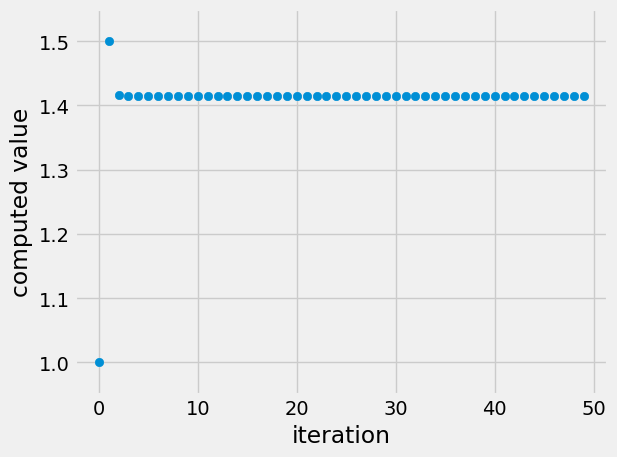

In [57]:
plt.scatter(range(nr_steps), xs)
plt.ylim(0.95, 1.55)
plt.xlabel("iteration")
plt.ylabel("computed value")
plt.tight_layout()
plt.savefig(os.path.join(basedir, "1.3-convergence.png"))

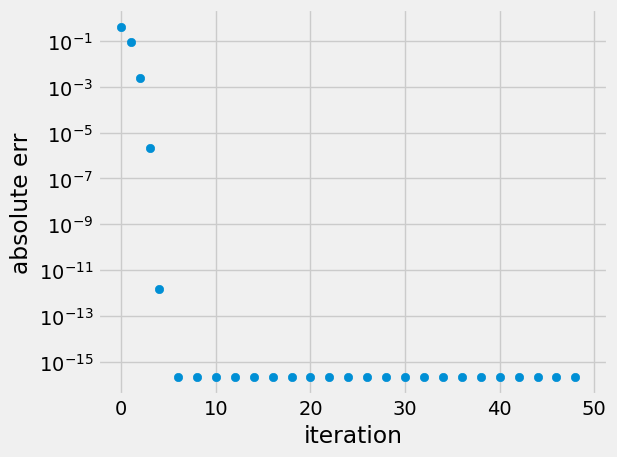

In [58]:
from math import sqrt

actual = sqrt(2)

errors = [abs(x - actual) for x in xs]

plt.scatter(range(nr_steps), errors)
plt.xlabel("iteration")
plt.ylabel("absolute err")
plt.yscale('log')
plt.tight_layout()
plt.savefig(os.path.join(basedir, "1.3-error.png"))

## 2.1 - Solving DiffEqs with Varying Precision

In [59]:
from math import pi, e

pi1 = round(pi, 8)
pi2 = round(pi, 9)
y0 = pi

xmin = 0.0
xmax = 10.0
h = 0.1

steps = int((xmax - xmin) / h)

print(pi1, pi2, sep="\n")

3.14159265
3.141592654


In [60]:
y = lambda x: (pi * y0)/(y0 + (pi - y0) * e**(x**2))
yp = lambda x: (2 / pi) * x * y(y0 - pi)

true_vals = {xmin + i * h: y(xmin + i * h) for i in range(steps + 1)}

In [61]:
y1 = lambda x: (pi1 * y0)/(y0 + (pi1 - y0) * e**(x**2))
yp1 = lambda x: (2 / pi1) * x * y1(y0 - pi1)

solved_8 = solve_euler(yp1, xmin, y0, xmax, h)

In [62]:
y2 = lambda x: (pi2 * y0)/(y0 + (pi2 - y0) * e**(x**2))
yp2 = lambda x: (2 / pi2) * x * y2(y0 - pi2)

solved_9 = solve_euler(yp2, xmin, y0, xmax, h)

In [63]:
abs_errors_8 = [abs(t[0] - t[1]) for t in zip(true_vals.values(), solved_8.values())]
abs_errors_9 = [abs(t[0] - t[1]) for t in zip(true_vals.values(), solved_9.values())]

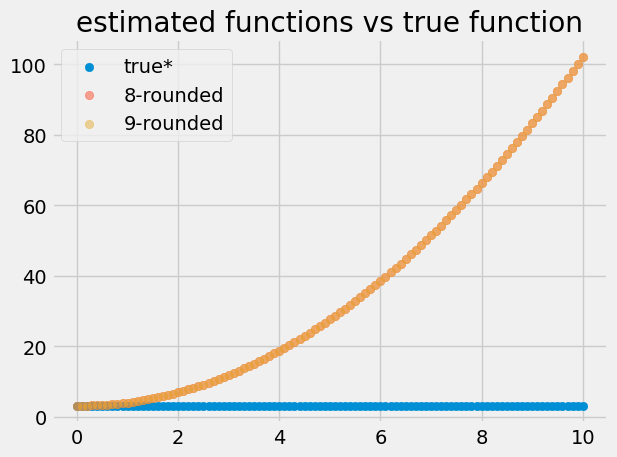

In [64]:
plt.scatter(list(true_vals.keys()), list(true_vals.values()), label="true*")
plt.scatter(list(true_vals.keys()), list(solved_8.values()), label="8-rounded", alpha=0.5)
plt.scatter(list(true_vals.keys()), list(solved_9.values()), label="9-rounded", alpha=0.5)
plt.legend()
plt.title("estimated functions vs true function")
plt.tight_layout()
plt.savefig(os.path.join(basedir, "2.1-plots.png"))

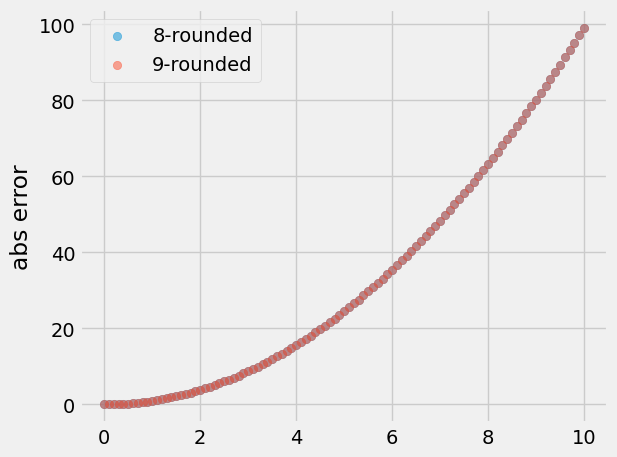

In [65]:
plt.scatter(list(true_vals.keys()), abs_errors_8, label="8-rounded", alpha=0.5)
plt.scatter(list(true_vals.keys()), abs_errors_9, label="9-rounded", alpha=0.5)
plt.ylabel("abs error")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(basedir, "2.1-error.png"))

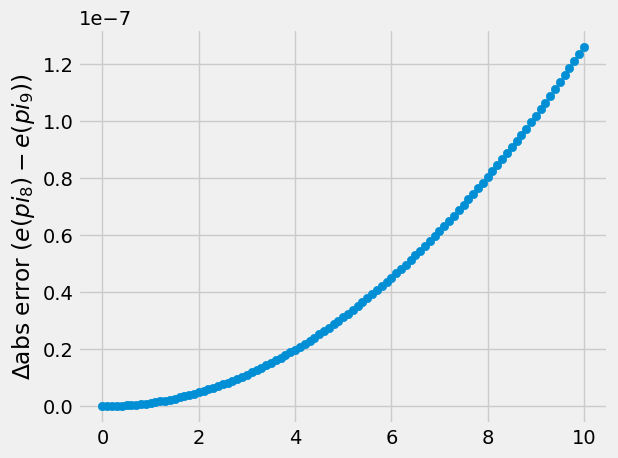

In [66]:
diff_errors = [t[0] - t[1] for t in zip(abs_errors_8, abs_errors_9)]
plt.scatter(list(true_vals.keys()), diff_errors)
plt.ylabel("$\Delta$abs error ($e(pi_8) - e(pi_9)$)")
plt.tight_layout()
plt.savefig(os.path.join(basedir, "2.1-error-diff.png"))

### Using a different rounding

In [67]:
pi3 = round(pi, 10)
print(pi2, pi3, sep="\n")

3.141592654
3.1415926536


In [68]:
y3 = lambda x: (pi3 * y0)/(y0 + (pi3 - y0) * e**(x**2))
yp3 = lambda x: (2 / pi3) * x * y1(y0 - pi3)

solved_10 = solve_euler(yp3, xmin, y0, xmax, h)

In [69]:
abs_errors_10 = [abs(t[0] - t[1]) for t in zip(true_vals.values(), solved_10.values())]

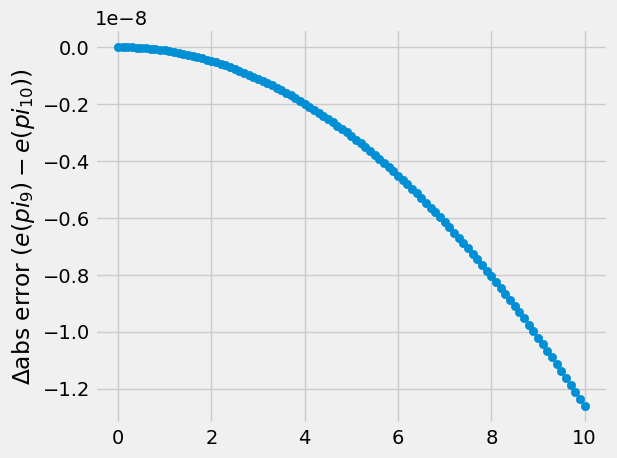

In [70]:
diff_errors = [t[0] - t[1] for t in zip(abs_errors_9, abs_errors_10)]
plt.scatter(list(true_vals.keys()), diff_errors)
plt.ylabel("$\Delta$abs error ($e(pi_9) - e(pi_{10})$)")
plt.tight_layout()
plt.savefig(os.path.join(basedir, "2.1-error-diff-10.png"))

## 2.2 - Unstable Linear System

In [71]:
import numpy as np

A1 = np.matrix([[2, -4], [-2.998, 6.001]], np.float32)
A2 = np.matrix([[2, -4], [-2.998, 6]], np.float32)
Y = np.matrix([[1], [2]])

sol1 = np.linalg.solve(A1, Y)
sol2 = np.linalg.solve(A2, Y)

print(sol1, sol2, sep = "\n")

print(np.linalg.det(A1))

[[1400.06794774]
 [ 699.78397387]]
[[1749.91822625]
 [ 874.70911312]]
0.010000229


## 3.2 - More Stable Quadratic Formula

In [72]:
from methods import solve_quadratic_normal, solve_quadratic_stable

np.random.seed(100)
As = np.random.uniform(10**3, 10**4, 10)
Bs = np.random.uniform(10**12, 10**15, 10)
Cs = np.random.uniform(10**3, 10**5, 10)

pairs = [(As[i], Bs[i], Cs[i]) for i in range(10)]


In [73]:
# code to generate the latex table cause I can't be asked lol

table = r"""
\begin{tabular}{|c|c|c|c|}
	\hline"""

for i, (a, b, c) in enumerate(pairs):
	table += f""" $Q_{i}$ & ${a}$ & ${b}$ & ${c}$\\\\\n\t\\hline"""

table += "\n\\end{tabular}"
print(table)


\begin{tabular}{|c|c|c|c|}
	\hline $Q_0$ & $5890.6444761186885$ & $891430632357951.8$ & $43738.71418264905$\\
	\hline $Q_1$ & $3505.3244658441654$ & $209992919995072.4$ & $94062.95214261509$\\
	\hline $Q_2$ & $4820.658316742198$ & $186142891330524.97$ & $81947.28849889601$\\
	\hline $Q_3$ & $8602.985190879133$ & $109268513573790.88$ & $34275.083061968966$\\
	\hline $Q_4$ & $1042.4697057187532$ & $220477795132367.16$ & $18365.634920491328$\\
	\hline $Q_5$ & $2094.122087048028$ & $978645160922662.2$ & $37910.372582702395$\\
	\hline $Q_6$ & $7036.741762541008$ & $811871465940234.0$ & $1563.162227904769$\\
	\hline $Q_7$ & $8432.67479594543$ & $172769071719861.62$ & $25990.208991039202$\\
	\hline $Q_8$ & $2230.3593071645764$ & $816408523977114.1$ & $79770.58833885545$\\
	\hline $Q_9$ & $6175.83996484525$ & $274799673294657.47$ & $2510.242153387562$\\
	\hline
\end{tabular}


In [74]:
solutions_normal = [solve_quadratic_normal(t[0], t[1], t[2]) for t in pairs]
solutions_stable = [solve_quadratic_stable(t[0], t[1], t[2]) for t in pairs]

In [75]:
def compute(system: tuple[float, float, float], x: float) -> float:
	(a, b, c) = system
	
	return a * x**2 + b * x + c

In [76]:
eval_normal0 = [compute(pairs[i], solutions_normal[i][0]) for i in range(len(pairs))]
eval_normal1 = [compute(pairs[i], solutions_normal[i][1]) for i in range(len(pairs))]
eval_stable0 = [compute(pairs[i], solutions_stable[i][0]) for i in range(len(pairs))]
eval_stable1 = [compute(pairs[i], solutions_stable[i][1]) for i in range(len(pairs))]

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


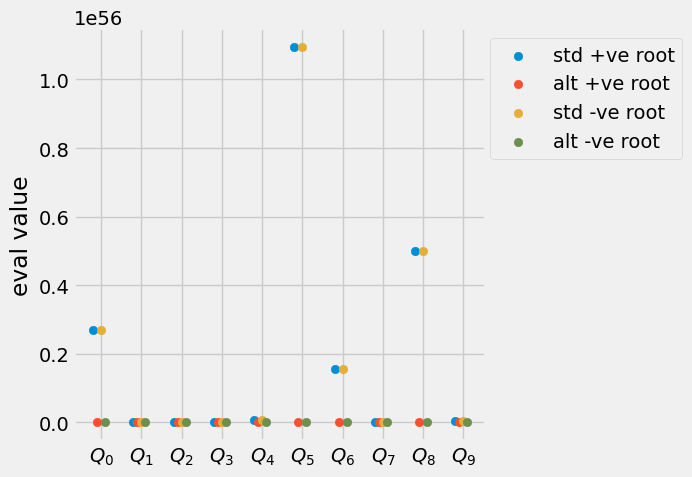

In [77]:
xs1 = [i * 10 for i in range(10)]
xs2 = [i + 1 for i in xs1]
xs3 = [i + 2 for i in xs1]
xs4 = [i + 3 for i in xs1]
labels = [f"$Q_{{{i}}}$" for i in range(len(xs1))]

print(xs1)

fig, ax = plt.subplots(figsize=(9, 5))

ax.scatter(xs1, eval_normal0, label="std +ve root")
ax.scatter(xs2, eval_stable0, label="alt +ve root")
ax.scatter(xs3, eval_normal1, label="std -ve root")
ax.scatter(xs4, eval_stable1, label="alt -ve root")
ax.set_xticks(xs3)
ax.set_xticklabels(labels)
ax.set_ylabel("eval value")
ax.legend(bbox_to_anchor=(1.5, 1))
fig.tight_layout()
fig.savefig(os.path.join(basedir, "3.2-compare.png"), pad_inches = None)


## 3.3 - Integration by Iteration through Parts...

In [78]:
from math import e, pi
from methods import trapezoid_integral

I0 = 1 - 1/e

table1 = [I0]
for i in range(1, 21):
	table1.append(1 - i * table1[-1])

pisq = pi**2
table2 = [I0, table1[1]]
for i in range(2, 21):
	table2.append((1/pi) - (i * (i - 1) / pisq) * table2[-2])

actuals = [I0]
for i in range(1, 21):
	f = lambda x: (x**i) * (e**(x-1))
	actuals.append(trapezoid_integral(f, 0, 1, 0.0000005)[0])

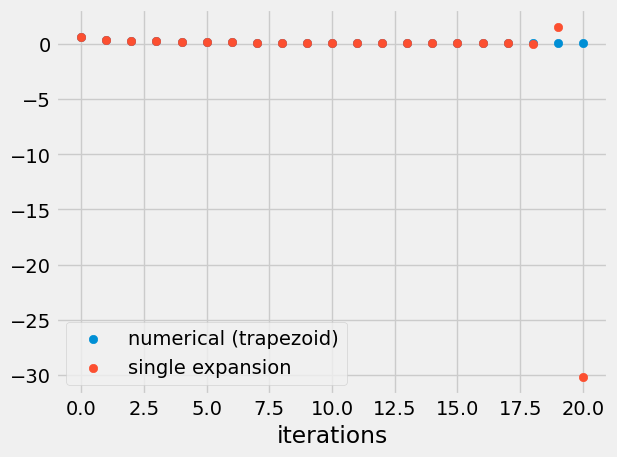

In [79]:
xs = list(range(21))

plt.scatter(xs, actuals, label="numerical (trapezoid)")
plt.scatter(xs, table1, label="single expansion")
plt.legend()
plt.xlabel("iterations")
plt.tight_layout()
plt.savefig(os.path.join(basedir, "3.3-single.png"))

In [80]:
i = 19

print(table1[i-1])
term = i * table1[i-1]

term, 1 - term

-0.029453670751536265


(-0.559619744279189, 1.559619744279189)

In [87]:
actuals

[0.6321205588285577,
 0.367879941158311,
 0.2642416176397502,
 0.20727714700817712,
 0.1708939118626155,
 0.14553344054859058,
 0.1268028565357351,
 0.1123840040425075,
 0.10093246741802256,
 0.091612792961477,
 0.08387757007472181,
 0.0773527288336023,
 0.07177375361865422,
 0.06694820254598977,
 0.0627326639115541,
 0.05901804084931126,
 0.05571984590112421,
 0.05277161913878607,
 0.050120354927813346,
 0.047723255765877236,
 0.04554538404545293]

In [81]:
table2

[0.6321205588285577,
 0.36787944117144233,
 0.19021547973345976,
 0.09466600368075687,
 0.08703559553951962,
 0.12647645531130688,
 0.05375339941139362,
 -0.21990936832742108,
 0.013313835206733016,
 1.922576265677856,
 0.19690226740692107,
 -21.109437430742275,
 -2.315139058826084,
 333.97628698122537,
 43.01052849829353,
 -7105.8449582500925,
 -1045.5723276809204,
 195832.87147997002,
 32417.537812123544,
 -6785969.952064618,
 -1248141.3364100612]

In [82]:
i = 11

print(table2[i - 2])
term = (i * (i - 1)/(pisq)) * table2[i - 2]
print(term)
print(1/pi)

1.922576265677856
21.427747316926066
0.3183098861837907


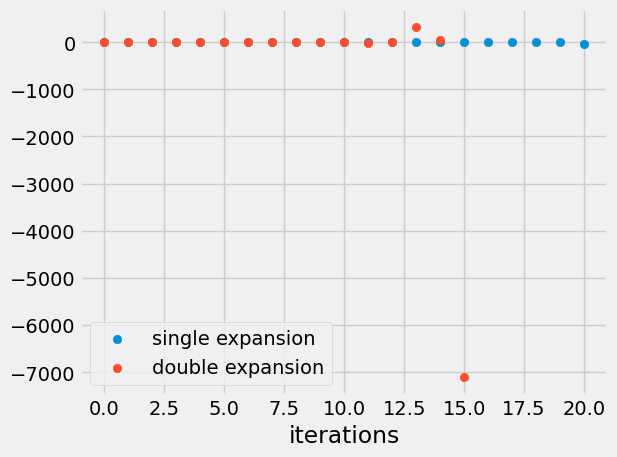

In [83]:
xs = list(range(21))

plt.scatter(xs, table1, label="single expansion")
plt.scatter(xs[:-5], table2[:-5], label="double expansion")
plt.legend()
plt.xlabel("iterations")
plt.tight_layout()
plt.savefig(os.path.join(basedir, "3.3-double.png"))

## 3.4 - Means & Deviations

In [84]:
def compute_mean(xs: list[float]) -> float:
	return sum(xs) / len(xs)

def compute_std_naive(xs: list[float]) -> float:
	accum = 0

	mean = compute_mean(xs)
	for x in xs:
		accum += (x - mean)**2

	return 1/len(xs) * accum

def compute_std_one_pass(xs: list[float]) -> float:
	accum = 0

	mean = compute_mean(xs)
	for x in xs:
		accum += x**2

	return 1/len(xs) * accum - mean**2

In [85]:
xs = [1e43 + i for i in range(10)]

print(np.var(xs))
print(compute_std_naive(xs))
compute_std_one_pass(xs)

1.532495540865889e+54
1.532495540865889e+54


-2.7606985387162255e+70